#선형회귀 실습
##처음부터 작성하기


In [0]:
import numpy as np
import random as rd
import matplotlib.pylab as plt
from matplotlib import cm

path = "/content/drive/My Drive/Colab Notebooks/assignment-02/data.csv"
train_set = np.genfromtxt(path, delimiter=',')


m = train_set.shape[0]



02번 숙제와 같은 nparray를 쓰고 있으므로 그냥 바로 씁니다.  
정체미상의 데이터들입니다. $$[[x_1,y_1],...]$$

# Input points [2pt]

1. plot a set of points $ \{(x^{(i)}, y^{(i)})\}$ that are loaded from 'data.csv' file (in black color)

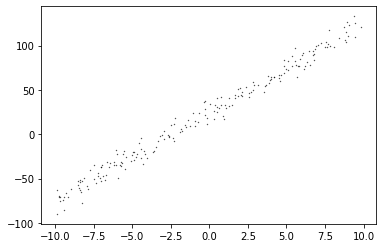

In [15]:
plt.scatter(train_set[:,0],train_set[:,1], c="black", s=0.1)
plt.show()

# Linear regression
모델은 다음과 같다.
$$ h_\theta​(x)=\theta_0​+\theta_1​x $$
cost는 다음과 같다.
$$ J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}​(h_\theta​(x^{(i)})−y^{(i)})^{2} $$

$ \theta_0​, \theta_1$은 -30에서 시작한다. (문제에 표기)


함수 h(th0, th1, x)를 정의하여 편의를 위해 사용한다.  
J 함수로 오차를 일단 생각해본다.  
역시 오차가 이상하므로 GD를 시작한다.

$$ \theta_0(t+1)​ := \theta_0(t)​−α​\frac{1}{m}\sum_{i=1}^{m}​(h_θ​(x^{(i)})−y^{(i)}) $$
$$ \theta_1(t+1) := \theta_1(t)−α\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})−y^{(i)})x^{(i)}$$

이것을 바탕으로 다음 $\theta$를 정해봅니다.



In [0]:
g_th0 = -30
g_th1 = -30
alpha = 0.01


def h(th0, th1, x):
    return th0 + th1*x

def J(th0, th1):
    
    sum = 0
    # 0으로 설정한 것에 집중하고 아래의 플로팅을 체크하라
    for i in range(m):
        # train_set[i,0] ith row, x-axis
        sum = sum + ((h(th0, th1, train_set[i,0]) - train_set[i,1]) ** 2)
    return (1/(2*m)) * sum

def th0_cal(th0, th1):
    sum = 0
    for i in range(m):
        sum = sum + (h(th0, th1, train_set[i,0]) - train_set[i,1])
    return (1/m) * sum

def th1_cal(th0, th1):
    sum = 0
    for i in range(m):
        sum = sum + ((h(th0, th1, train_set[i,0]) - train_set[i,1]) * train_set[i,0])
    return (1/m) * sum

In [17]:
J_log = [J(g_th0, g_th1)]
th0_log = [g_th0]
th1_log = [g_th1]

# import sys
e = 5*10 ** (-6)
from tqdm import tqdm, trange

for i in tqdm(range(550000)):
    temp0 = g_th0-alpha*(1/m)* th0_cal(g_th0, g_th1)
    temp1 = g_th1-alpha*(1/m)* th1_cal(g_th0, g_th1)
    g_th0 = temp0
    g_th1 = temp1
    J_log.append(J(g_th0, g_th1))
    th0_log.append(g_th0)
    th1_log.append(g_th1)
    if abs(J(g_th0, g_th1)) < 1 and abs(g_th0 - th0_log[-2]) <= e and abs(g_th1 - th1_log[-2]) <= e and abs(J(g_th0, g_th1) - J_log[-2]) <=e:
        break


print("\ng_th0 : ", g_th0, "g_th1 : ", g_th1, "cost : ", J(g_th0, g_th1))


100%|██████████| 550000/550000 [08:49<00:00, 1037.90it/s]


g_th0 :  24.907393293864796 g_th1 :  9.934635539219572 cost :  27.467506725904563


# 코드 구조의 설명
학습율은 0.01로 하면, 초기 검사에서 적합하다는 사실을 얻었습니다.
(발산하지 않는 정도에서 적당히 컸음)

the optimization should be performed until convergence 라는 조건문을 보고
모든 변화율이 특정 값 아래로 떨어지면 정지시키려고 하였습니다.

if abs(J(g_th0, g_th1)) < 1 and abs(g_th0 - th0_log[-2]) <= e and abs(g_th1 - th1_log[-2]) <= e and abs(J(g_th0, g_th1) - J_log[-2]) <=e:를 조건으로 사용하려고 하였습니다만, (기울기가 더 이상 변하지 않는 것)
(단 e는 시스템의 float의 입실론값)

언제 멈출 지 모르기도 하고, 진행사항을 확인하기가 너무 어려워, 
250,000 회 반복해서, 진행사항을 확인했습니다.
아직 bias가 학습되지 않았으므로 
적당히 돌아갈 수 있는 크기인
350,000 회로 설정하여 테스트합니다.

g_th0 :  2.4751128432339686 g_th1 :  0.9963501834570437 cost :  3.5559549191289355

코스트가 3~4 이였습니다.

적당하다고 생각해서 

abs(J(g_th0, g_th1) - J_log[-2]) 등의 값을 조사하여보니
7.304113649730937e-05 등의 값을 얻었습니다.

그래서 e 값을 $$ 5*10^{-6}$$
으로 두고 이때의 변화율에 도달한다면, 프로그램을 정지시키도록 하였습니다.

최종적으로 550,000 번을 돌고, 중간에 e 이하로 학습 변화율이 떨어진다면 정지시키도록 하였습니다.




In [18]:
print(abs(J(g_th0, g_th1)))
print(abs(g_th0 - th0_log[-2]))
print(abs(g_th1 - th1_log[-2]))
print(abs(J(g_th0, g_th1) - J_log[-2]))

27.467506725904563
3.552713678800501e-15
0.0
1.7763568394002505e-14


27.467506725904563  
3.552713678800501e-15  
0.0  
1.7763568394002505e-14  
으로 J는 아직 매우 작지는 않았습니다만, 변화율은 매우 작아서 바로 다음으로 갑니다.

# linear regression result [3pt]


1. plot a set of points $\{ (x^{(i)}, y^{(i)}) \}$that are loaded from 'data.csv' file (in black color)
2. plot a straight line obtained by the optimal linear regression based on the given set of points (in red color)
3. the estimated straight line (linear function) is superimposed on the set of points

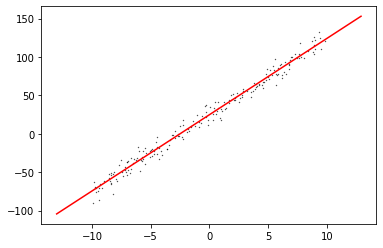

In [19]:
plt.scatter(train_set[:,0],train_set[:,1], c="black", s=0.1)

x_plot_data = np.arange(-13,13,0.1)
y_plot_data = g_th0 + x_plot_data * g_th1

plt.plot(x_plot_data,y_plot_data,'r-')

plt.show()

# Plot the energy surface [4pt]


1. plot the energy surface $(\theta_0, \theta_1, J(\theta_0, \theta_1) $with the range of variables $\theta_0 = [-30 : 0.1 : 30]$ and $\theta_1 = [-30 : 0.1 : 30] $

In [0]:
X = np.arange(-30,30,0.1)
Y = np.arange(-30,30,0.1)
X, Y = np.meshgrid(X, Y)
Z = np.array([J(th0, th1) for th0,th1 in zip(X,Y)])
# zip이 O(len(X or Y)) 이라고 생각하고, 모든 점을순회하지 않는다고 생각했겠지만
# 이미 모든 점을 나열해놓은 것이기 때문에, O(len(X or Y)) = O(n x n)

여기서 `arrange(始, 終, 단위)` 로 ndarray를 만들어낸다.  
meshgrid 라는 것은 그래픽과 관련된 개념이다.  
이 라이브러리는 3차원을 표현할때 2차원 격자점을 두고 그 격자점 각각에 z값을 대입하는 형식으로 surface를 ploting 한다.  

이때 X, Y는 격자점을 의미한다.
최초 X, Y는 수들의 나열이다. 이는 표현될 도메인의 영역을 X축, Y축별로 지정해준 것이다. $$
X = \left(
    \begin{array}{c}
      1,2,3,4,5, \dots
    \end{array}
\right)\;
Y = \left(
    \begin{array}{c}
      1,2,3,4,5, \dots
    \end{array}
\right)
$$  
이를 meshgrid라는 함수를 사용하면 ndarray $(n\times n)$ 형태로 바뀐 X, Y가 각각 나오는데
$$
X = \begin{pmatrix}
       1 & 2 & 3 & \dots           \\
       1 & 2 & 3 & \dots  \\
       1 & 2 & 3 & \dots \\
        \dots & \dots & \dots & \ddots
     \end{pmatrix},\;
     Y = \begin{pmatrix}
       1 & 1 & 1  & \dots            \\
       2 & 2 & 2 & \dots    \\
       3 & 3 & 3 & \dots   \\
        \dots & \dots & \dots & \ddots
     \end{pmatrix}
$$
이는 `zip(X,Y)` 卽, `X[i], Y[i]`식 접근을 했을때 모든 격자점들이 iterate될 수 있게 펴놓은 것이라고 보면 된다.

이에 해당하는 Z를 만들어야 하는데 물론 Z의 차원도 $(n\times n)$이다.
이는 다음을 의미한다.

$$
     Z = \begin{pmatrix}
       f(x_1,y_1) & f(x_2,y_1) & f(x_3,y_1)  & \dots            \\
       f(x_1,y_2) & f(x_2,y_2) & f(x_3,y_2) & \dots    \\
       f(x_1,y_3) & f(x_2,y_3) & f(x_3,y_3) & \dots  \\ 
        \dots & \dots & \dots & \ddots
     \end{pmatrix}
$$

참고해야할 점은 `X[i]` or  `Y[i]`가 integer가 아니라 ndarray값이라는 것인데  
우리는 J함수를 integer형 param으로 의도하여 만들었다고 해도  
ndarray의 연산자는 모두 그 원소 각각에 적용되게 만들어졌기 때문에 vector 단위로 연산되어 vector단위로 리턴된다.


E.g. 1
```python
for th0,th1 in zip(X,Y):
    print(th0,'\n', th1)
    break
```
을 해본다면, th0는 -30부터 30까지 th1은 -30만 계속 나오는 것을 알 수 있습니다.
위의 행렬에서 첫번째줄만 쭉 가져온다고 볼 수 있습니다.

E.g. 2
```python
for th0,th1 in zip(X,Y):
    result = J(th0, th1)
    print(result)
    break
```
result는 ndarray, 크기 600입니다.

만약 J함수의 맨 위에 print('called')라는 구문을 넣으면
1회만 실행되기에 1회만 출력한다는 사실을 알 수 있습니다.  
또한 print(type(sum)) 라는 것을 하면 맨 위애 sum = 0이라고 정의했음에도 불구하고  
`<class 'numpy.ndarray'>` 로 출력되는 것을 확인 할 수 있습니다.  


sum은 아래에서 ndarray 혹은 integer의 연산 결과와 더해져서 sum에 저장되게 되는데,  
파이썬의 약한 타입 정책에 따라, 0과 ndarray는 연산되고, sum의 저장위치에 덮어씌여져,  
어느샌가 int형에서 ndarray로 바뀌게 된 것입니다.


```python
for th0,th1 in zip(X,Y):
    result = th1+100
    print(result)
    print(type(result))
    break
```
다음과 같은 코드로 파이썬의 약한 타입 정책을 확인 할 수 있었습니다.


  
데이터를 바탕으로 3차원 그래프를 그린다.


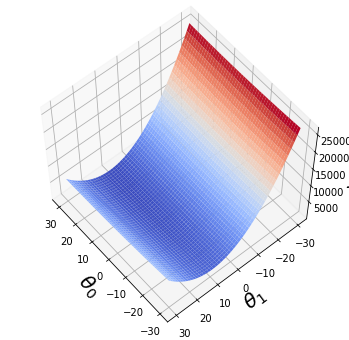

In [21]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')

ax.set_xlabel(r'$\theta_0​$', fontsize=20)
ax.set_ylabel(r'$\theta_1$', fontsize=20)
ax.set_zlabel(r'$J$', fontsize=20)
# 앞에 r을 붙여주면 라텍스로 읽는다.

ax.view_init(60, 140)
# 시점 설정
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=True)

plt.show()

# Plot the gradient descent path on the energy surface [5pt]


1. plot the energy surface $(\theta_0, \theta_1, J(\theta_0, \theta_1) $with the range of variables $\theta_0 = [-30 : 0.1 : 30]$ and $\theta_1 = [-30 : 0.1 : 30] $

2. plot the energy value with the updated variables $\theta_0^{(t)} and\, \theta_1^{(t)}$​ at each gradient descent step on the energy surface

3. the initial condition is used by $\theta_0^{(0)} = -30\; and\; \theta_1^{(0)} = -30$

4. the gradient descent is performed until the convergence is achieved

5. the gradient descent path is superimposed on the energy surface

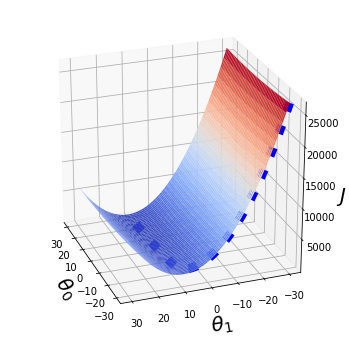

In [45]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')

ax.set_xlabel(r'$\theta_0​$', fontsize=20)
ax.set_ylabel(r'$\theta_1$', fontsize=20)
ax.set_zlabel(r'$J$', fontsize=20)
# 앞에 r을 붙여주면 라텍스로 읽는다.

ax.view_init(25, 160)
# 시점 설정
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=True)

ax.plot(th0_log, th1_log, J_log,':b',LineWidth = 9,label='movement')
# ax.scatter(th0_log, th1_log, J_log)


plt.show()

